**17-AC**

###  Ботов А.В. 17-АС ###
### Вариант 1. ###

Цель лабораторной работы – получение навыков работы с методами регрессии
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1) ##

1. d - идентификационный номер
2. date - дата продажи
3. price - стоимость
4. bedrooms - кол-во спален
5. bathrooms - кол-во ванных комнат
6. sqft_living - жилая площадь
7. sqft_lot - общая площадь
8. floors - кол-во этажей
9. waterfront - наличие береговой линии
10. view - вид
11. condition - состояние дома
12. grade - класс
13. sqft_above - площадь над уровнем земли
14. sqft_basement - площадь под уровнем земли
15. yr_built - год постройки
16. yr_renovated - год ремонта
17. zipcode - почтовый индекс
18. lat - широта
19. long - долгота
20. sqft_living15 - жилая площадь ближайших 15 соседей
21. sqft_lot15 - общая площадь ближайших 15 соседей

## 2)##

In [4]:
print("До удаления дубликатов: %d" % len(df))
df.drop_duplicates(keep="first", inplace=True)
print("После удаления дубликатов: %d" % len(df))

До удаления дубликатов: 21613
После удаления дубликатов: 21613


## 3)##

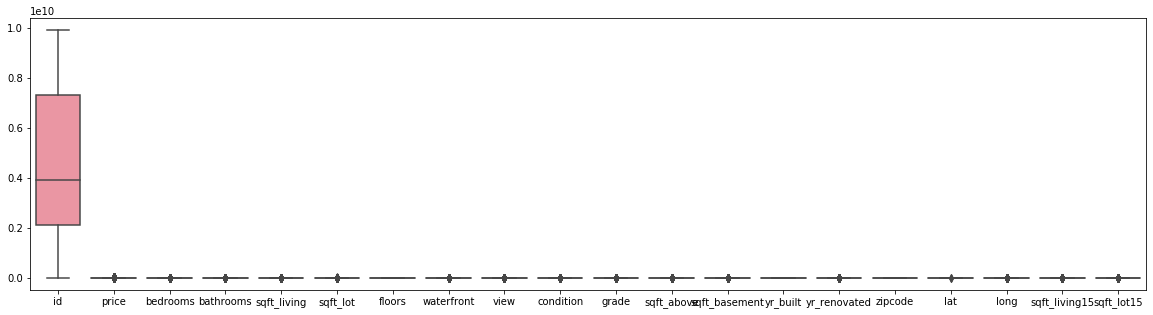

In [5]:
plt.figure(figsize=(20,5))
numerical = [c for c in df.columns if df[c].dtype.name != 'object']
sns.boxplot(data = df[numerical])

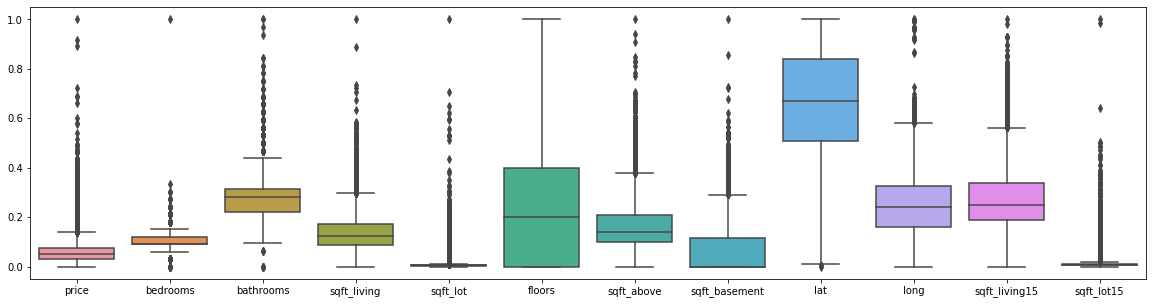

In [7]:
plt.figure(figsize=(20,5))
column = ['price', 'bedrooms', 'bathrooms', 
                       'sqft_living', 'sqft_lot', 'floors', 
                       'sqft_above', 'sqft_basement', 'lat',
                       'long', 'sqft_living15', 'sqft_lot15']
scaler = preprocessing.MinMaxScaler()
df[column] = scaler.fit_transform(df[column].values.astype(float))
sns.boxplot(data = df[column])
plt.show()

## 4) ##

In [8]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [9]:
categorial = ['waterfront', 'view', 'condition', 'grade']
df[categorial]

,waterfront,view,condition,grade
0,0,0,3,7
1,0,0,3,7
2,0,0,3,6
3,0,0,5,7
4,0,0,3,8
...,...,...,...,...
21608,0,0,3,8
21609,0,0,3,8
21610,0,0,3,7
21611,0,0,3,8


## 5) ##

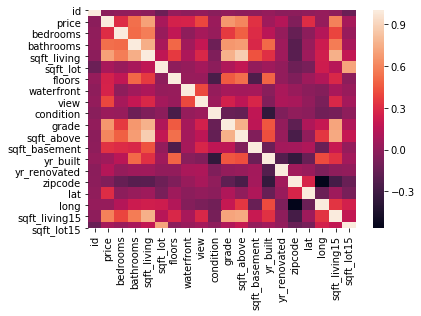

In [10]:
corr = df.corr()
sns.heatmap(corr)

## 6) ##

In [11]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

## 7) ##

1 – линейная регрессия без использования регуляризаторов;

In [12]:
df = df.drop(['id', 'date', 
              'yr_built', 'yr_renovated'], axis = 1)

In [14]:
data_x, data_y = df.drop(['price'], axis=1), df['price']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 123)
reg = LinearRegression()
reg.fit(train_x, train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

5506     0.008285
9279     0.010332
16034    0.026065
6608     0.023220
20359   -0.000400
8798     0.001058
10035   -0.008127
13321    0.015162
15842    0.029890
12119    0.026363
1799    -0.001654
15078   -0.029110
19275   -0.014118
4699    -0.001345
4762    -0.035416
Name: price, dtype: float64


In [16]:
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print("Pearson correlation: ", P, 'p_value: ', p_value_P)
print("Spearman correlation: ", S, "p_value: ", p_value_S)

Pearson correlation:  0.829891984279018 p_value:  0.0
Spearman correlation:  0.8437884537189452 p_value:  0.0


3 – линейная регрессия, RIDGE регуляризатор;

In [17]:
reg = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(train_x, train_y)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

C:\Users\Temab\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Temab\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.82938e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Temab\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26525e-22): result may not be accurate.
  overwrite_a=True).T


best alpha: 0.05


In [18]:
reg = Ridge(alpha=best_alpha)
reg.fit(train_x,train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

5506     0.008293
9279     0.010293
16034    0.026002
6608     0.023234
20359   -0.000372
8798     0.001009
10035   -0.008087
13321    0.015166
15842    0.029891
12119    0.026353
1799    -0.001652
15078   -0.029112
19275   -0.014114
4699    -0.001359
4762    -0.035378
Name: price, dtype: float64
